# Sommaire
  * [Chapitre I - Importation et Nettoyage](#chapter1)
   * [ Analyse Fichier](#section_1_1)
    * [Population](#section_1_1_1)
      * [Lecture](#section_1_1_2)
      * [Analyse & Nettoyage](#section_1_1_3)
      * [Jointure](#section_1_1_4)
    * [Dispo_alimentaire](#section_2_1)
        * [Lecture](#section_2_1_1)
        * [Dispo_Totale](#section_2_1_2)
        * [Dispo_Poulet](#section_2_1_3)
    * [Stabilité Politique](#section_3_1)
        * [Lecture](#section_3_1_1)
        * [Analyse & Nettoyage](#section_3_1_2)
    * [PIB](#section_4_1)
        * [lecture](#section_4_1_1)
        * [Analyse & Nettoyage](#section_4_1_2)
    * [Emission CO²](#section_5_1)
        * [Lecture](#section_5_1_1)
        * [Analyse & Nettoyage](#section_5_1_2)
    * [Set Final](#section_6_1)
        * [Jointure](#section_6_1_1)
        * [Analyse & Nettoyage](#section_6_1_2)
    * [Conclusion](#section_7_1)

# Chapitre I - Importation et Nettoyage <a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
Population=pd.read_csv('Population_2000_2018.csv')
Dispo_alimentaire=pd.read_csv('DisponibiliteAlimentaire_2017.csv')
Stabilité_Politique=pd.read_csv('Stabilité Politique.csv')
PIB=pd.read_csv('PIB.csv')
Empreinte_Carbone=pd.read_csv('Emission CO2.csv')

## Analyse Fichier <a class="anchor" id="section_1_1"></a>

### Population <a class="anchor" id="section_1_1_1"></a>

#### Lecture <a class="anchor" id="section_1_1_2"></a>

In [4]:
Population.head()


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [5]:
# On vérifie les informations sur notre dataset
Population.info()
Population.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

(4411, 15)

In [6]:
Population.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


<AxesSubplot: >

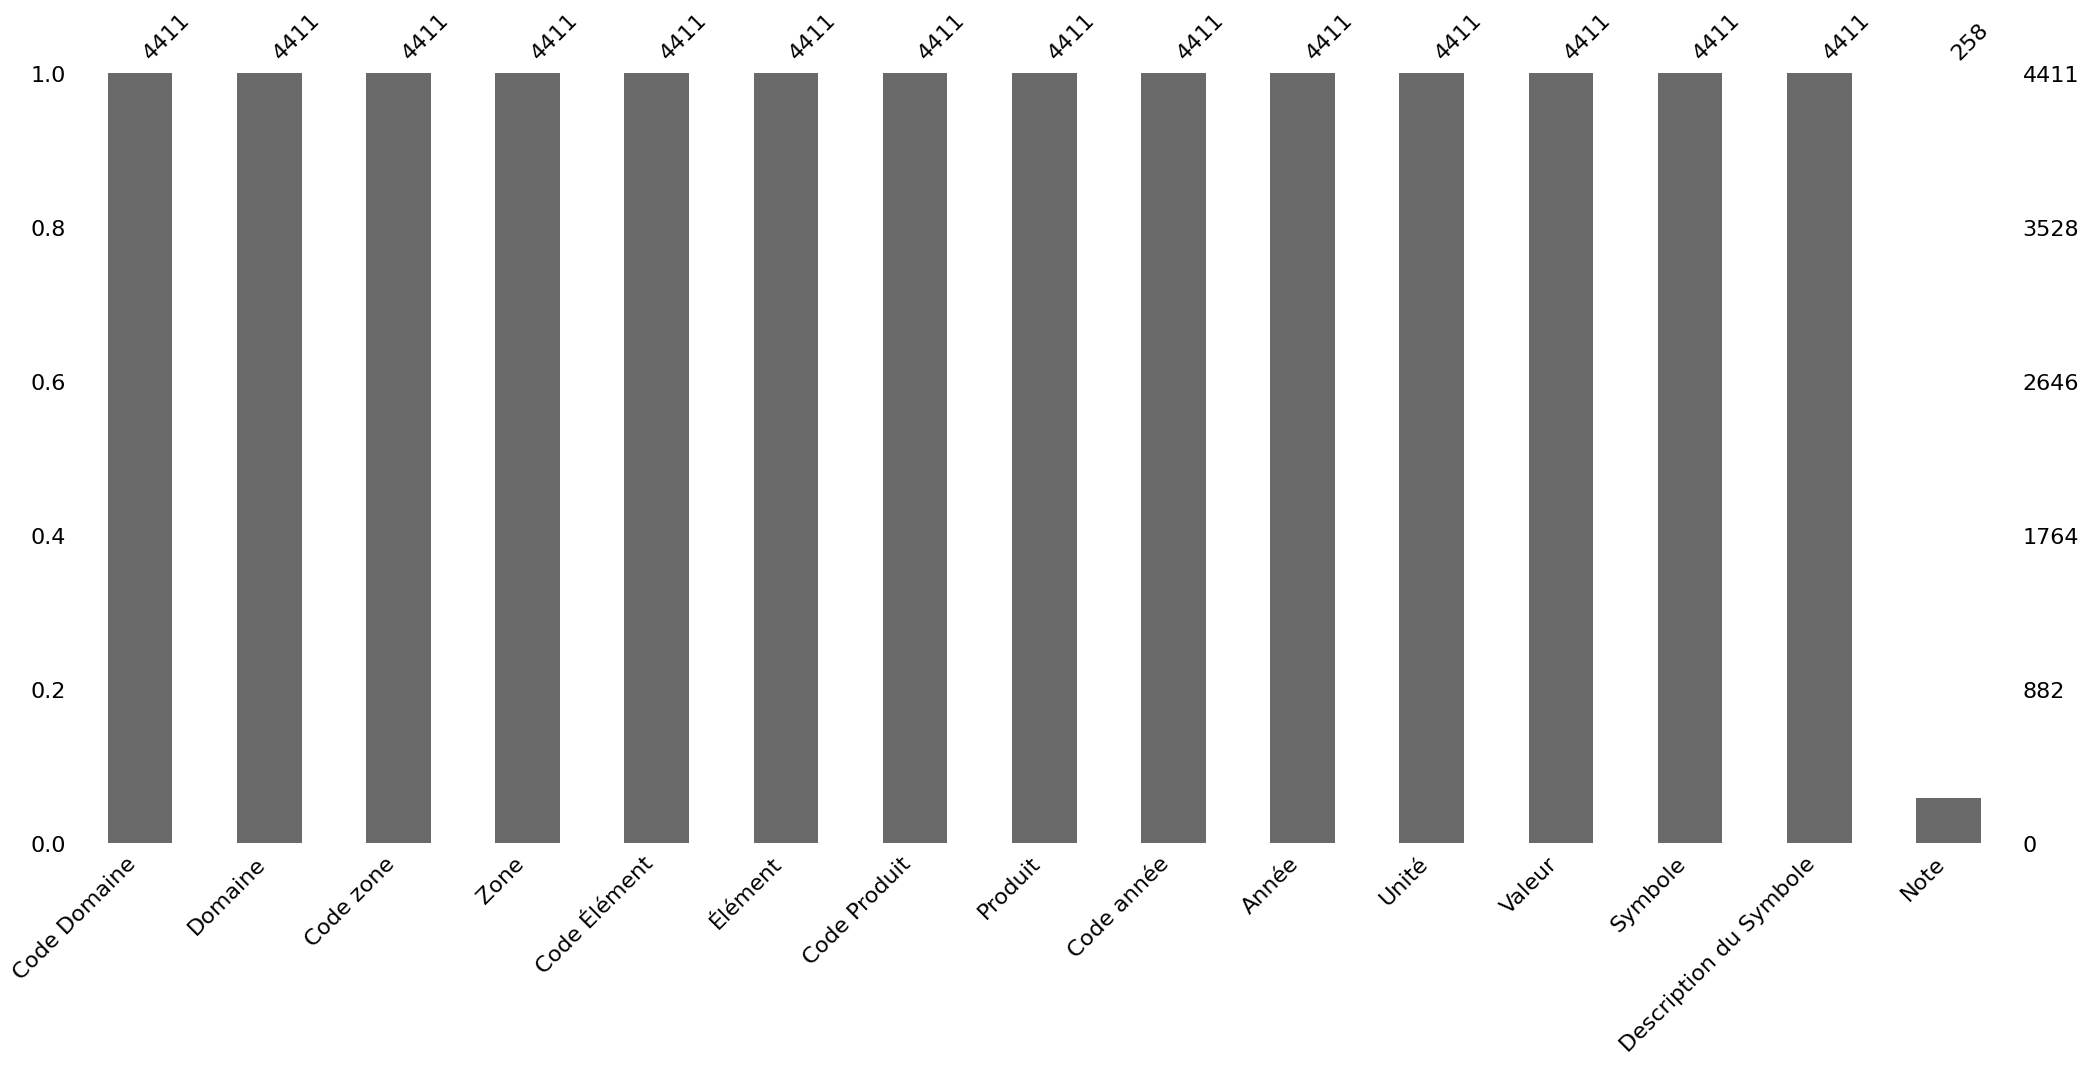

In [7]:
msno.bar(Population)

In [8]:
# Ajout de la colonne Population à l'échelle
Population['Population']=Population['Valeur']*1000

In [9]:
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [10]:
Population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note,Population
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN,20779953.0
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN,21606988.0
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN,22600770.0
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN,23680871.0
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN,24726684.0


#### Nettoyage & Analyse <a class="anchor" id="section_1_1_3"></a>

In [11]:
# Modification du type de notre Donnée Population en Int
Population=Population.astype({'Population':int})


In [12]:
# On choisit les Colonnes qui nous interesse 
Population=Population[['Zone','Année','Population']]

In [13]:
Population.head()

,Zone,Année,Population
0,Afghanistan,2000,20779953
1,Afghanistan,2001,21606988
2,Afghanistan,2002,22600770
3,Afghanistan,2003,23680871
4,Afghanistan,2004,24726684


In [14]:
# Création d'un fichier en concordance avec les données du fichier dispo alimentaire qui est de 2017
Population_2017=Population[Population['Année']==2017].reset_index(drop=True)


In [15]:
Population_2017

,Zone,Année,Population
0,Afghanistan,2017,36296113
1,Afrique du Sud,2017,57009756
2,Albanie,2017,2884169
3,Algérie,2017,41389189
4,Allemagne,2017,82658409
...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484
232,Viet Nam,2017,94600648
233,Yémen,2017,27834819
234,Zambie,2017,16853599


In [16]:
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Zone        4411 non-null   object
 1   Année       4411 non-null   int64 
 2   Population  4411 non-null   int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 86.3+ KB


In [17]:
# Modification du type de donnée
Population=Population.astype({'Année':str})


In [18]:
# Nous allons déterminer l'évolution de la population entre 2000 et 2017
Population_Evo=Population[Population['Année'].isin(['2000','2017'])].reset_index(drop=True)

In [19]:
Population_Evo

,Zone,Année,Population
0,Afghanistan,2000,20779953
1,Afghanistan,2017,36296113
2,Afrique du Sud,2000,44967708
3,Afrique du Sud,2017,57009756
4,Albanie,2000,3129243
...,...,...,...
460,Yémen,2017,27834819
461,Zambie,2000,10415944
462,Zambie,2017,16853599
463,Zimbabwe,2000,11881477


In [20]:
#Nous allons tourner le data Set afin d'avoir une meilleur vision des données
Population_Evo=Population_Evo.pivot_table(index='Zone',columns='Année',values='Population')


In [21]:
Population_Evo

Année,2000,2017
Zone,,
Afghanistan,20779953.0,36296113.0
Afrique du Sud,44967708.0,57009756.0
Albanie,3129243.0,2884169.0
Algérie,31042235.0,41389189.0
Allemagne,81400882.0,82658409.0
...,...,...
Îles Salomon,412660.0,636039.0
Îles Turques-et-Caïques,20164.0,37115.0
Îles Vierges américaines,108722.0,104751.0


In [22]:
#Ajout d'une nouvelle colonne pour le pourcentage d'évolution
Population_Evo['Pop%2000-2017']=(Population_Evo['2017']-Population_Evo['2000'])*100/Population_Evo['2000']

In [23]:
Population_Evo.head()

Année,2000,2017,Pop%2000-2017
Zone,,,
Afghanistan,20779953.0,36296113.0,74.668889
Afrique du Sud,44967708.0,57009756.0,26.779324
Albanie,3129243.0,2884169.0,-7.831734
Algérie,31042235.0,41389189.0,33.331859
Allemagne,81400882.0,82658409.0,1.544857


In [24]:
# Suppression des colonnes inutiles 
Population_Evo.drop(columns=['2000','2017'],inplace=True)

### Jointure <a class="anchor" id="section_1_1_4"></a>

In [25]:
# Création du fichier final
Pop_Final=pd.merge(Population_2017,Population_Evo,how='inner',on='Zone')

In [26]:
Pop_Final

,Zone,Année,Population,Pop%2000-2017
0,Afghanistan,2017,36296113,74.668889
1,Afrique du Sud,2017,57009756,26.779324
2,Albanie,2017,2884169,-7.831734
3,Algérie,2017,41389189,33.331859
4,Allemagne,2017,82658409,1.544857
...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484,21.535805
232,Viet Nam,2017,94600648,18.383382
233,Yémen,2017,27834819,59.886862
234,Zambie,2017,16853599,61.805776


In [27]:
Pop_Final.describe()

,Année,Population,Pop%2000-2017
count,236.0,2.360000e+02,227.000000
mean,2017.0,3.198362e+07,29.274454
std,0.0,1.318949e+08,36.900699
min,2017.0,7.930000e+02,-19.014564
25%,2017.0,3.803032e+05,6.786094
50%,2017.0,5.203510e+06,21.845950
75%,2017.0,1.930842e+07,45.840011
max,2017.0,1.421022e+09,359.894543


Text(0.5, 1.0, 'Répartition des Outliers')

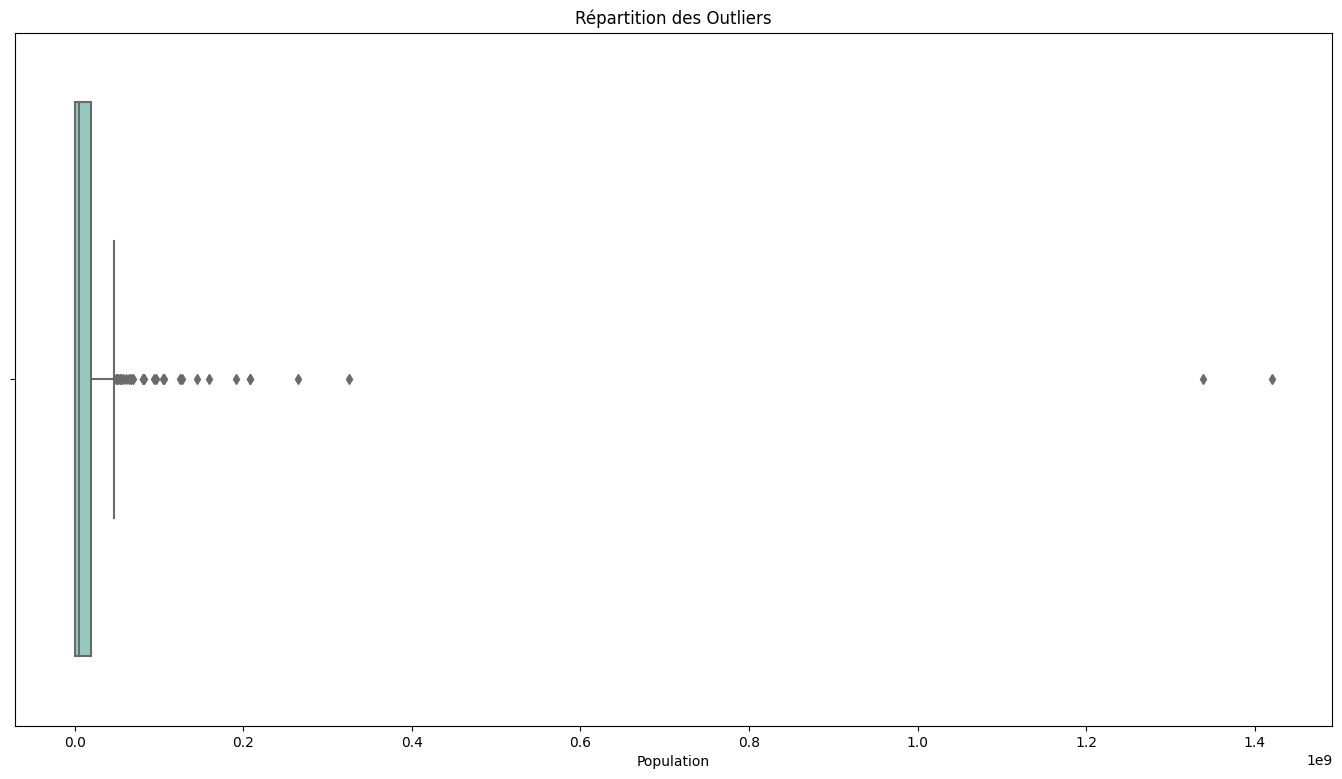

In [28]:
# Première visualisation des outliers sur notre fichier de Population
plt.figure(figsize=(17,9))
sns.boxplot(x=Pop_Final['Population'],palette='Set3').set_title('Répartition des Outliers')

In [29]:
Q1=Pop_Final['Population'].quantile(q=0.25, interpolation='midpoint')
Q3=Pop_Final['Population'].quantile(q=0.75, interpolation='midpoint')
IQ=Q3-Q1
Lim_outlier_inf=round((Q1-1.5*IQ),2)
Lim_outlier_sup=round((Q3+1.5*IQ),2)

Outliers_inf=Pop_Final['Population']<Lim_outlier_inf
Outliers_sup=Pop_Final['Population']>Lim_outlier_sup

print('Limites des outliers inférieurs',Lim_outlier_inf,'Million Pers')
print('Les index des outliers inférieurs sont : ',np.where(Outliers_inf[0],))

print('Limites des outliers supérieur',Lim_outlier_sup,'Million Pers')
print('Les index des outliers supérieur sont :',np.where(Outliers_sup)[0],)
print("Le nombre d'outliers est  supérieur à ", len(np.where(Outliers_sup)[0],))

Limites des outliers inférieurs -28188273.5 Million Pers
Les index des outliers inférieurs sont :  (array([], dtype=int64),)
Limites des outliers supérieur 47990726.5 Million Pers
Les index des outliers supérieur sont : [  1   4  19  31  43  46  57  65  66  67  70 103 104 105 110 112 115 139
 146 152 160 168 176 178 182 185 218 226 232]
Le nombre d'outliers est  supérieur à  29


In [30]:
Outlier_supérieur=Pop_Final.loc[Pop_Final['Population']>47990726.5,('Zone','Population')]
Outlier_supérieur

,Zone,Population
1,Afrique du Sud,57009756
4,Allemagne,82658409
19,Bangladesh,159685424
31,Brésil,207833823
43,"Chine, continentale",1421021791
46,Colombie,48909839
57,Égypte,96442591
65,États-Unis d'Amérique,325084756
66,Éthiopie,106399924
67,Fédération de Russie,145530082


 On peut voir que nos Outliers sont supérieurs aux 3ème quartile et éloigné de notre médiane 


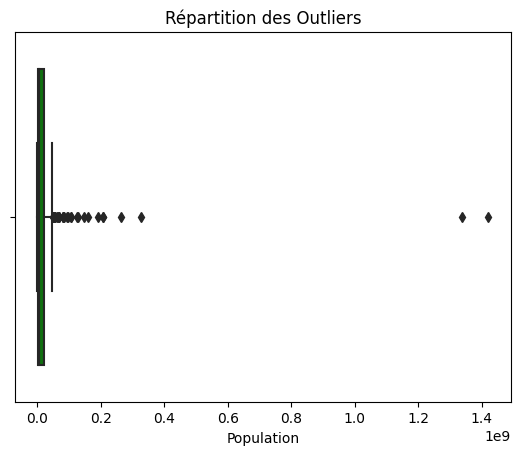

In [31]:
sns.boxplot(x=Pop_Final['Population'],color='Green').set_title('Répartition des Outliers')
print(" On peut voir que nos Outliers sont supérieurs aux 3ème quartile et éloigné de notre médiane ")    

In [32]:
print('La population totale que représente les Outliers est de ',Outlier_supérieur['Population'].sum(),"d'habitants")
print('La population totale que représente les Outliers est de ',Pop_Final['Population'].sum(),"d'habitants")
print("Les Outliers représente",round((Outlier_supérieur['Population'].sum()/Pop_Final['Population'].sum()*100),2),"% de la Population")

La population totale que représente les Outliers est de  5818740214 d'habitants
La population totale que représente les Outliers est de  7548134107 d'habitants
Les Outliers représente 77.09 % de la Population


Les Outliers représente une grande partie de nos données de population en ce sens nous allons les garder afin de ne pas faussée nos données 

In [33]:
Pop_Final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Zone           236 non-null    object 
 1   Année          236 non-null    int64  
 2   Population     236 non-null    int32  
 3   Pop%2000-2017  227 non-null    float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 16.4+ KB


In [34]:
# On vérifie la liste de Pays de la colonne Zone 
Pop_Final['Zone'].unique()


array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Curaçao', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équate

In [35]:
Pop_Final['Zone'].nunique()

236

In [36]:
# Apparition multiple de la Chine:'Chine - RAS de Macao', 'Chine, continentale','Chine, Taiwan Province de'


In [37]:
Pop_Final.describe()

,Année,Population,Pop%2000-2017
count,236.0,2.360000e+02,227.000000
mean,2017.0,3.198362e+07,29.274454
std,0.0,1.318949e+08,36.900699
min,2017.0,7.930000e+02,-19.014564
25%,2017.0,3.803032e+05,6.786094
50%,2017.0,5.203510e+06,21.845950
75%,2017.0,1.930842e+07,45.840011
max,2017.0,1.421022e+09,359.894543


In [38]:
Pop_Final['Zone'].duplicated().sum()

0

In [39]:
Pop_Final.isnull().sum()

Zone             0
Année            0
Population       0
Pop%2000-2017    9
dtype: int64

In [40]:
# remplacement des Valeurs Nan 
Pop_Final['Pop%2000-2017']=Pop_Final['Pop%2000-2017'].fillna(0)

### Dispo_alimentaire <a class="anchor" id="section_2_1"></a>

#### Lecture <a class="anchor" id="section_2_1_1"></a>

In [41]:
Dispo_alimentaire.info()
Dispo_alimentaire.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées
5,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5521,Aliments pour animaux,2511,Blé et produits,2017,2017,Milliers de tonnes,76.0,S,Données standardisées
6,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5527,Semences,2511,Blé et produits,2017,2017,Milliers de tonnes,344.0,S,Données standardisées
7,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2511,Blé et produits,2017,2017,Milliers de tonnes,642.0,S,Données standardisées
8,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5170,Résidus,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
9,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2511,Blé et produits,2017,2017,Milliers de tonnes,5640.0,S,Données standardisées


In [42]:
Dispo_alimentaire.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


<AxesSubplot: >

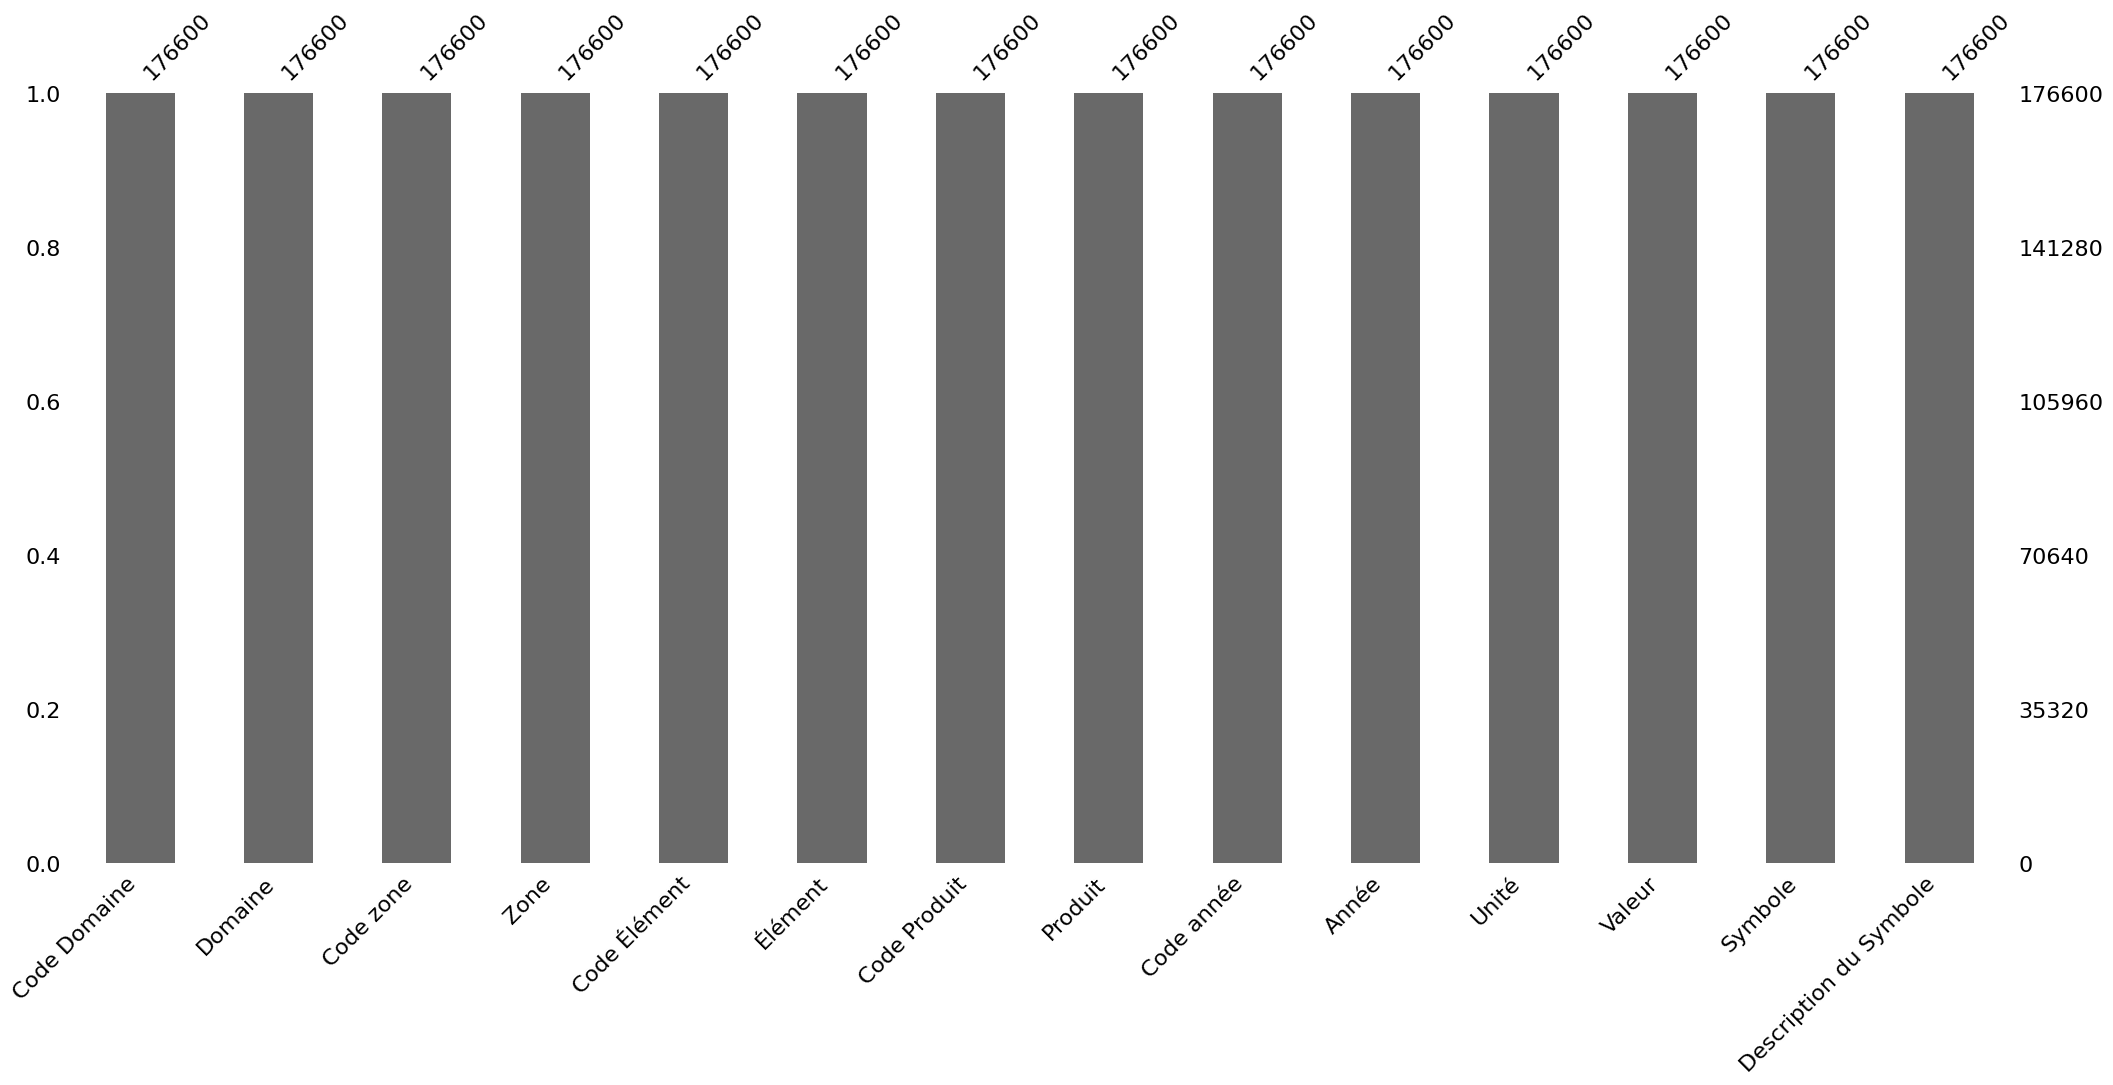

In [43]:
msno.bar(Dispo_alimentaire)

#### Création Dispo_Totale <a class="anchor" id="section_2_1_2"></a>

In [44]:
Dispo_Alimentaire=Dispo_alimentaire[['Zone','Élément','Produit','Valeur','Unité']]

In [45]:
Dispo_Alimentaire

,Zone,Élément,Produit,Valeur,Unité
0,Afghanistan,Production,Blé et produits,4281.00,Milliers de tonnes
1,Afghanistan,Importations - Quantité,Blé et produits,2302.00,Milliers de tonnes
2,Afghanistan,Variation de stock,Blé et produits,-119.00,Milliers de tonnes
3,Afghanistan,Exportations - Quantité,Blé et produits,0.00,Milliers de tonnes
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.00,Milliers de tonnes
...,...,...,...,...,...
176595,Zimbabwe,Nourriture,Miscellanees,19.00,Milliers de tonnes
176596,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,1.33,kg
176597,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,1.00,Kcal/personne/jour
176598,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,0.04,g/personne/jour


In [46]:
Dispo_Alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Zone     176600 non-null  object 
 1   Élément  176600 non-null  object 
 2   Produit  176600 non-null  object 
 3   Valeur   176600 non-null  float64
 4   Unité    176600 non-null  object 
dtypes: float64(1), object(4)
memory usage: 6.7+ MB


In [47]:
# Modification du fichier de dispo alimentaire
Dispo_Alim2017=Dispo_Alimentaire.pivot_table(index='Zone',columns='Élément',values='Valeur',aggfunc=np.sum).reset_index()

In [48]:
Dispo_Alim2017.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,456.0,94.0,1997.0,357.31,30.63,54.09,15139.0,601.0,4555.0,12968.0,1146.0,11609.0,-111.0,470.0,115.0,426.0
1,Afrique du Sud,0.0,9371.0,1448.0,2987.0,556.42,81.92,83.36,66840.0,10968.0,9020.0,31726.0,3108.0,68455.0,-594.0,212.0,21564.0,-322.0
2,Albanie,NaN,697.0,177.0,3400.0,1260.49,117.57,119.50,4879.0,156.0,884.0,3631.0,321.0,4231.0,-115.0,53.0,113.0,72.0
3,Algérie,0.0,4884.0,2405.0,3345.0,798.71,79.62,92.85,45365.0,743.0,19718.0,33056.0,3683.0,26763.0,-22.0,358.0,993.0,374.0
4,Allemagne,NaN,30904.0,8316.0,3559.0,943.24,147.96,104.07,174960.0,58793.0,66550.0,77988.0,5756.0,167828.0,-831.0,1712.0,51109.0,651.0


In [49]:
Dispo_Alim2017.isnull().sum()

Élément
Zone                                                              0
Alimentation pour touristes                                      95
Aliments pour animaux                                             0
Autres utilisations (non alimentaire)                             0
Disponibilité alimentaire (Kcal/personne/jour)                    2
Disponibilité alimentaire en quantité (kg/personne/an)            2
Disponibilité de matière grasse en quantité (g/personne/jour)     2
Disponibilité de protéines en quantité (g/personne/jour)          2
Disponibilité intérieure                                          0
Exportations - Quantité                                           0
Importations - Quantité                                           0
Nourriture                                                        0
Pertes                                                            4
Production                                                        0
Résidus                                 

In [50]:
Dispo_Alim2017.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,456.0,94.0,1997.0,357.31,30.63,54.09,15139.0,601.0,4555.0,12968.0,1146.0,11609.0,-111.0,470.0,115.0,426.0
1,Afrique du Sud,0.0,9371.0,1448.0,2987.0,556.42,81.92,83.36,66840.0,10968.0,9020.0,31726.0,3108.0,68455.0,-594.0,212.0,21564.0,-322.0
2,Albanie,NaN,697.0,177.0,3400.0,1260.49,117.57,119.50,4879.0,156.0,884.0,3631.0,321.0,4231.0,-115.0,53.0,113.0,72.0
3,Algérie,0.0,4884.0,2405.0,3345.0,798.71,79.62,92.85,45365.0,743.0,19718.0,33056.0,3683.0,26763.0,-22.0,358.0,993.0,374.0
4,Allemagne,NaN,30904.0,8316.0,3559.0,943.24,147.96,104.07,174960.0,58793.0,66550.0,77988.0,5756.0,167828.0,-831.0,1712.0,51109.0,651.0


In [51]:
Dispo_Alim2017=Dispo_Alim2017[['Zone','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Production','Pertes']]

In [52]:
Dispo_Alim2017
# Exprimer en millier de tonne

Élément,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Pertes
0,Afghanistan,15139.0,601.0,4555.0,12968.0,11609.0,1146.0
1,Afrique du Sud,66840.0,10968.0,9020.0,31726.0,68455.0,3108.0
2,Albanie,4879.0,156.0,884.0,3631.0,4231.0,321.0
3,Algérie,45365.0,743.0,19718.0,33056.0,26763.0,3683.0
4,Allemagne,174960.0,58793.0,66550.0,77988.0,167828.0,5756.0
...,...,...,...,...,...,...,...
169,Émirats arabes unis,11795.0,4914.0,14986.0,5958.0,1793.0,525.0
170,Équateur,23810.0,8897.0,2134.0,9465.0,30843.0,860.0
171,États-Unis d'Amérique,849821.0,207278.0,84507.0,322036.0,974034.0,36551.0
172,Éthiopie,55860.0,1259.0,2967.0,38502.0,52164.0,2915.0


In [53]:
# Le but est d'obtenir la consomation total en fonction des différentes utilisations des pays
Dispo_Alim2017=Dispo_Alim2017.rename(columns={'Exportations - Quantité':'Exportations Totale','Importations - Quantité':'Importations Totale','Nourriture':'Nourriture Totale','Pertes':'Pertes Totales','Production':'Production Totale'})

In [54]:
Dispo_Alim2017.head(40)

Élément,Zone,Disponibilité intérieure,Exportations Totale,Importations Totale,Nourriture Totale,Production Totale,Pertes Totales
0,Afghanistan,15139.0,601.0,4555.0,12968.0,11609.0,1146.0
1,Afrique du Sud,66840.0,10968.0,9020.0,31726.0,68455.0,3108.0
2,Albanie,4879.0,156.0,884.0,3631.0,4231.0,321.0
3,Algérie,45365.0,743.0,19718.0,33056.0,26763.0,3683.0
4,Allemagne,174960.0,58793.0,66550.0,77988.0,167828.0,5756.0
5,Angola,32210.0,60.0,4153.0,17025.0,28523.0,3795.0
6,Antigua-et-Barbuda,84.0,0.0,71.0,59.0,23.0,1.0
7,Arabie saoudite,32403.0,2241.0,26414.0,18086.0,9037.0,803.0
8,Argentine,138346.0,63629.0,3391.0,34126.0,204480.0,3736.0
9,Arménie,4383.0,244.0,846.0,2962.0,3708.0,274.0


#### Création Dispo_Poulet <a class="anchor" id="section_2_1_3"></a>

In [55]:
# Recherche des produits correspondant au Poulet
Dispo_alimentaire['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [56]:
Dispo_Poulet=Dispo_alimentaire.loc[Dispo_alimentaire['Produit']=='Viande de Volailles'].reset_index()

In [57]:
Dispo_Poulet

,index,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,S,Données standardisées
1,652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,S,Données standardisées
2,653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
3,654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
4,655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,176396,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,67.00,S,Données standardisées
2057,176397,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,4.68,Fc,Donnée calculée
2058,176398,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,16.00,Fc,Donnée calculée
2059,176399,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,1.59,Fc,Donnée calculée


In [58]:
Dispo_Poulet=Dispo_Poulet.pivot_table(index='Zone',columns='Élément',values='Valeur').reset_index()

In [59]:
Dispo_Poulet=Dispo_Poulet[['Zone','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Production','Pertes',]]

In [60]:
Dispo_Poulet

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Pertes
0,Afghanistan,1.53,57.0,NaN,29.0,55.0,28.0,2.0
1,Afrique du Sud,35.69,2118.0,63.0,514.0,2035.0,1667.0,83.0
2,Albanie,16.36,47.0,0.0,38.0,47.0,13.0,NaN
3,Algérie,6.38,277.0,0.0,2.0,264.0,275.0,13.0
4,Allemagne,19.47,1739.0,646.0,842.0,1609.0,1514.0,NaN
...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,43.47,412.0,94.0,433.0,412.0,48.0,NaN
168,Équateur,19.31,341.0,0.0,0.0,324.0,340.0,17.0
169,États-Unis d'Amérique,55.68,18266.0,3692.0,123.0,18100.0,21914.0,NaN
170,Éthiopie,0.13,14.0,NaN,1.0,14.0,14.0,1.0


In [61]:
Dispo_Poulet=Dispo_Poulet.rename(columns={'Disponibilité alimentaire en quantité (kg/personne/an)':'Dispo Poulet en quantité (kg/personne/an)','Disponibilité intérieure': 'Dispo intérieure poulet', 
                        'Exportations - Quantité':'Exportations Poulet',
                        'Importations - Quantité':'Importations Poulet', 
                        'Production':'Production Poulet','Nourriture':'Consommation Poulet'})

In [62]:
Dispo_Poulet=pd.merge(Dispo_Poulet,Dispo_Alim2017, on='Zone',how='left' )

Nous allons rajouter des variables complémentaire afin d'élargir notre étude en croisant les données Totales de 2017 et les données spécifiques aux poulets

In [63]:
Dispo_Poulet['Taux_Import_P%']= round((Dispo_Poulet['Importations Poulet']*100/ Dispo_Poulet['Importations Totale']),2)
Dispo_Poulet['Taux_Export_P%']= round((Dispo_Poulet['Exportations Poulet']*100/ Dispo_Poulet['Exportations Totale']),2)
Dispo_Poulet['Taux_Conso_P%']= round((Dispo_Poulet['Consommation Poulet']*100/ Dispo_Poulet['Nourriture Totale']),2)

In [64]:
Dispo_Poulet.tail(30)

Élément,Zone,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Pertes,Disponibilité intérieure,Exportations Totale,Importations Totale,Nourriture Totale,Production Totale,Pertes Totales,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%
142,Soudan,1.60,69.0,NaN,2.0,65.0,67.0,3.0,31387.0,776.0,4063.0,20653.0,28852.0,1806.0,0.05,NaN,0.31
143,Sri Lanka,7.78,192.0,2.0,0.0,164.0,192.0,10.0,14141.0,856.0,4562.0,10796.0,9574.0,673.0,0.00,0.23,1.52
144,Suisse,15.72,133.0,4.0,51.0,133.0,91.0,NaN,12871.0,2030.0,4978.0,7860.0,10086.0,211.0,1.02,0.20,1.69
145,Suriname,31.06,25.0,5.0,18.0,18.0,10.0,0.0,654.0,184.0,189.0,326.0,701.0,49.0,9.52,2.72,5.52
146,Suède,16.60,187.0,23.0,84.0,164.0,157.0,NaN,16839.0,5401.0,7939.0,9200.0,14995.0,451.0,1.06,0.43,1.78
147,Sénégal,4.76,77.0,0.0,0.0,73.0,77.0,4.0,9756.0,784.0,4051.0,6771.0,6340.0,467.0,0.00,0.00,1.08
148,Tadjikistan,4.45,40.0,NaN,38.0,39.0,2.0,0.0,8263.0,131.0,1579.0,4802.0,6874.0,412.0,2.41,NaN,0.81
149,Tchad,0.45,7.0,0.0,1.0,7.0,6.0,0.0,7109.0,215.0,219.0,5154.0,7547.0,703.0,0.46,0.00,0.14
150,Tchéquie,21.96,249.0,27.0,116.0,234.0,163.0,NaN,20651.0,8951.0,6406.0,9251.0,22426.0,588.0,1.81,0.30,2.53
151,Thaïlande,12.95,881.0,796.0,2.0,896.0,1676.0,32.0,185696.0,67587.0,12436.0,38386.0,231734.0,6963.0,0.02,1.18,2.33


In [65]:
# Nous allons maintenant garder que les colonnes qui nous interesse 

Dispo_Poulet=Dispo_Poulet[['Zone','Dispo Poulet en quantité (kg/personne/an)','Dispo intérieure poulet','Exportations Poulet','Importations Poulet','Consommation Poulet','Production Poulet','Taux_Import_P%','Taux_Export_P%','Taux_Conso_P%']]

In [66]:
Dispo_Poulet['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Bélarus',
       'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chine, continentale', 'Chypre',
       'Colombie', 'Congo', 'Costa Rica', 'Croatie', 'Cuba',
       "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique',
       'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji',
       'Finlande', 'France', 'Fédération de Russie', 'Gabon', 'Gambie',
       'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti', 'Honduras',
       'Hongri

In [67]:
# On peut voir que nous n'avons pas le même nombre de Zone que sur le fichier de Pop_Final
Dispo_Poulet['Zone'].nunique()

172

In [68]:
# Nous allons vérifier quelles sont les Pays qui ne sont pas dans la liste de Zone du dataset Poulet par rapport au set Pop_Final
Pop_Final[~Pop_Final['Zone'].isin(Dispo_Poulet['Zone'].unique())]['Zone'].unique()

array(['Andorre', 'Anguilla', 'Antilles néerlandaises (ex)', 'Aruba',
       'Bahreïn', 'Bermudes', 'Bhoutan',
       'Bonaire, Saint-Eustache et Saba', 'Brunéi Darussalam', 'Burundi',
       'Comores', 'Curaçao', 'Érythrée', 'Gibraltar', 'Groenland',
       'Guadeloupe', 'Guam', 'Guinée équatoriale', 'Guyane française',
       'Île de Man', 'Îles Anglo-Normandes', 'Îles Caïmanes', 'Îles Cook',
       'Îles Falkland (Malvinas)', 'Îles Féroé', 'Îles Mariannes du Nord',
       'Îles Marshall', 'Îles Turques-et-Caïques',
       'Îles Vierges américaines', 'Îles Vierges britanniques',
       'Îles Wallis-et-Futuna', 'Libye', 'Liechtenstein', 'Martinique',
       'Mayotte', 'Micronésie (États fédérés de)', 'Monaco', 'Montserrat',
       'Nauru', 'Nioué', 'Palaos', 'Palestine',
       'Papouasie-Nouvelle-Guinée', 'Porto Rico', 'Qatar',
       'République arabe syrienne', 'République démocratique du Congo',
       'Réunion', 'Sahara occidental', 'Saint-Barthélemy',
       'Sainte-Hélène, Asce

In [69]:
Dispo_Poulet.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Zone                                       172 non-null    object 
 1   Dispo Poulet en quantité (kg/personne/an)  172 non-null    float64
 2   Dispo intérieure poulet                    170 non-null    float64
 3   Exportations Poulet                        135 non-null    float64
 4   Importations Poulet                        170 non-null    float64
 5   Consommation Poulet                        170 non-null    float64
 6   Production Poulet                          168 non-null    float64
 7   Taux_Import_P%                             170 non-null    float64
 8   Taux_Export_P%                             134 non-null    float64
 9   Taux_Conso_P%                              170 non-null    float64
dtypes: float64(9), object(1)
m

In [70]:
# Vérification des Nan
Dispo_Poulet.isnull().sum()

Élément
Zone                                          0
Dispo Poulet en quantité (kg/personne/an)     0
Dispo intérieure poulet                       2
Exportations Poulet                          37
Importations Poulet                           2
Consommation Poulet                           2
Production Poulet                             4
Taux_Import_P%                                2
Taux_Export_P%                               38
Taux_Conso_P%                                 2
dtype: int64

In [71]:
Dispo_Poulet=Dispo_Poulet.fillna(0)

In [72]:
Dispo_Poulet.isnull().sum()

Élément
Zone                                         0
Dispo Poulet en quantité (kg/personne/an)    0
Dispo intérieure poulet                      0
Exportations Poulet                          0
Importations Poulet                          0
Consommation Poulet                          0
Production Poulet                            0
Taux_Import_P%                               0
Taux_Export_P%                               0
Taux_Conso_P%                                0
dtype: int64

In [73]:
Dispo_Poulet.duplicated().sum()

0

### Stabilité Politique <a class="anchor" id="section_3_1"></a>

#### Lecture <a class="anchor" id="section_3_1_1"></a>

In [74]:
Stabilité_Politique.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,20162018,2016-2018,NaN,NaN,NaN,NaN,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,20162018,2016-2018,NaN,NaN,NaN,NaN,NaN
3,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,20162018,2016-2018,NaN,NaN,NaN,NaN,NaN


In [75]:
Stabilité_Politique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            406 non-null    object 
 1   Domaine                 406 non-null    object 
 2   Code zone (M49)         406 non-null    int64  
 3   Zone                    406 non-null    object 
 4   Code Élément            406 non-null    int64  
 5   Élément                 406 non-null    object 
 6   Code Produit            406 non-null    int64  
 7   Produit                 406 non-null    object 
 8   Code année              406 non-null    int64  
 9   Année                   406 non-null    object 
 10  Unité                   197 non-null    object 
 11  Valeur                  197 non-null    float64
 12  Symbole                 197 non-null    object 
 13  Description du Symbole  197 non-null    object 
 14  Note                    0 non-null      fl

<AxesSubplot: >

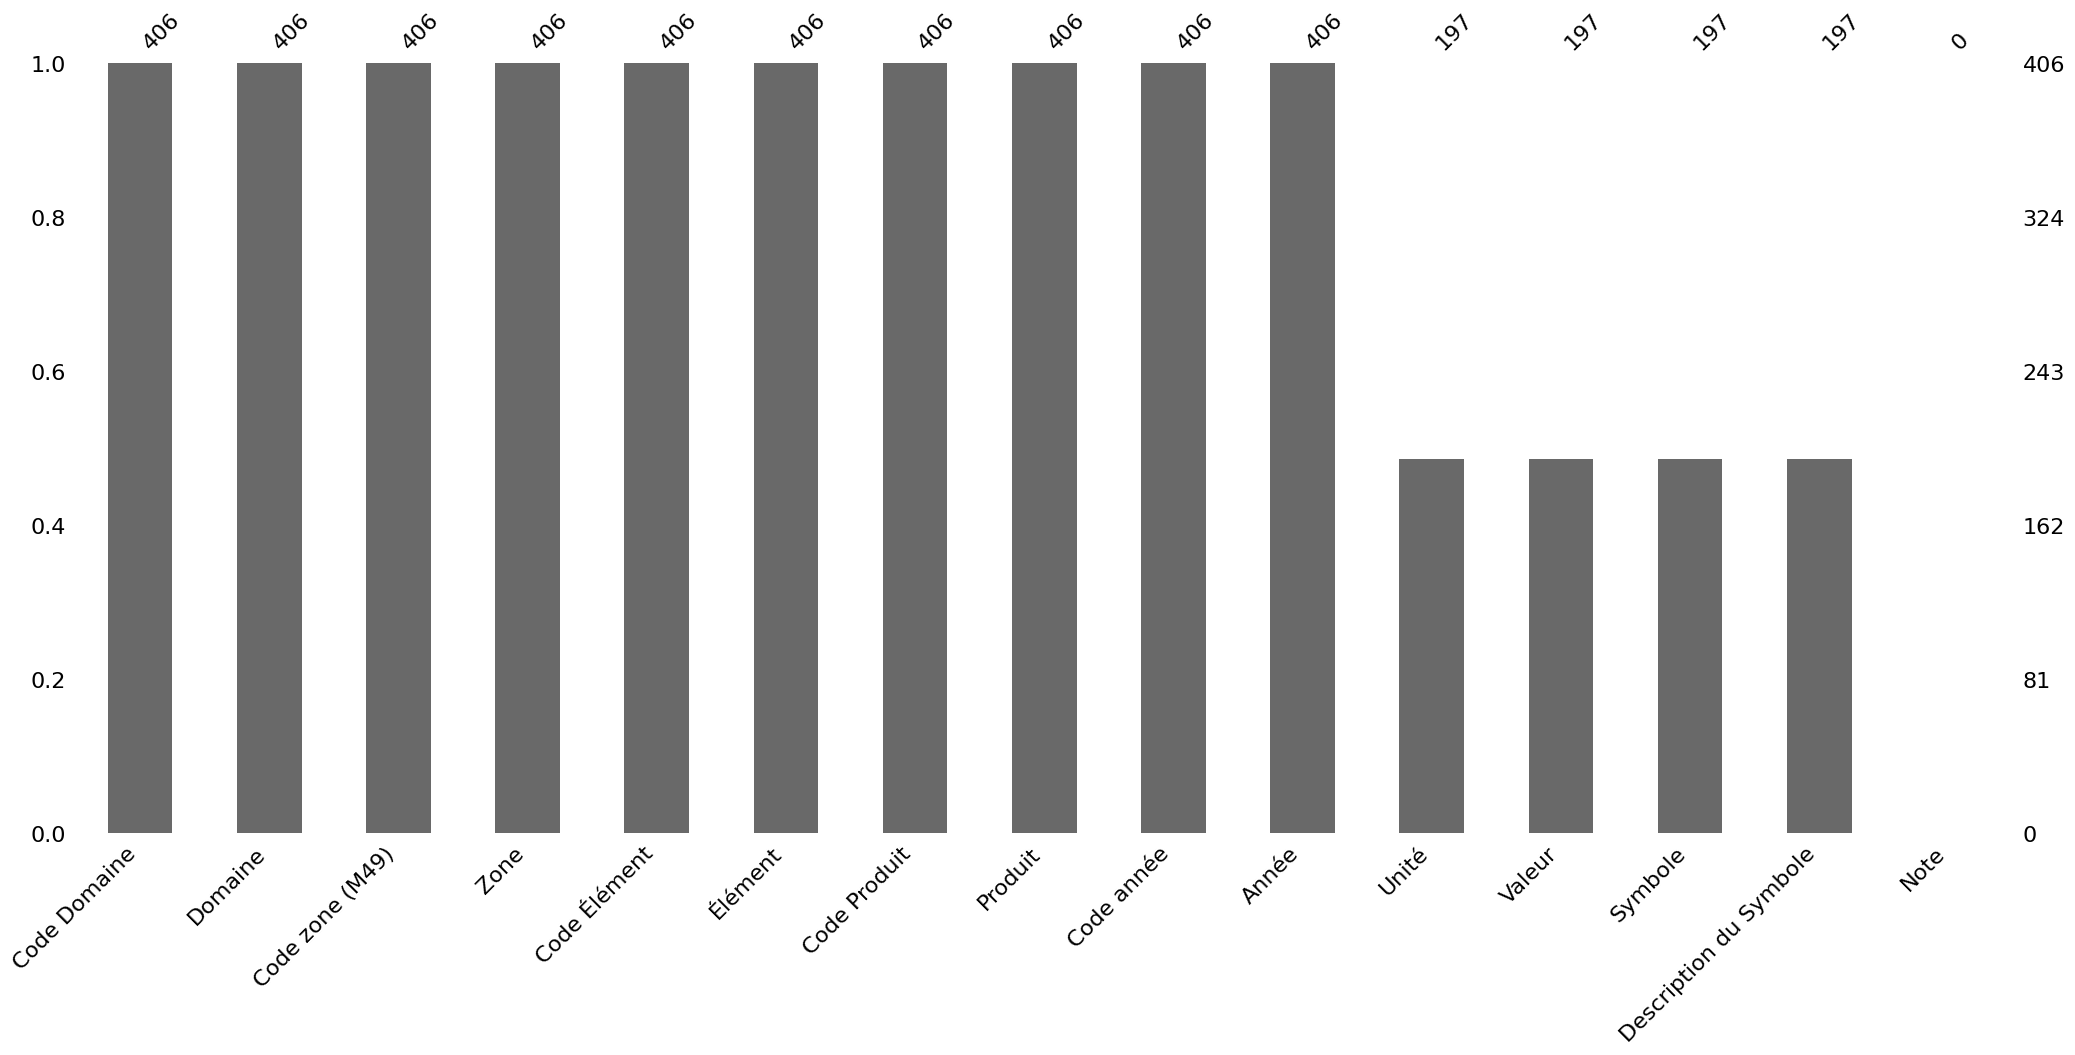

In [76]:
msno.bar(Stabilité_Politique)

#### Analyse & Nettoyage <a class="anchor" id="section_3_1_2"></a>

In [77]:
# Modification du type pour la colonne Année
Stabilité_Politique['Année']=Stabilité_Politique['Année'].replace('2016-2018','0')
Stabilité_Politique=Stabilité_Politique.astype({'Année':int})

In [78]:
Stabilité_Politique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            406 non-null    object 
 1   Domaine                 406 non-null    object 
 2   Code zone (M49)         406 non-null    int64  
 3   Zone                    406 non-null    object 
 4   Code Élément            406 non-null    int64  
 5   Élément                 406 non-null    object 
 6   Code Produit            406 non-null    int64  
 7   Produit                 406 non-null    object 
 8   Code année              406 non-null    int64  
 9   Année                   406 non-null    int32  
 10  Unité                   197 non-null    object 
 11  Valeur                  197 non-null    float64
 12  Symbole                 197 non-null    object 
 13  Description du Symbole  197 non-null    object 
 14  Note                    0 non-null      fl

In [79]:
Stab_Politique2017=Stabilité_Politique[Stabilité_Politique['Année']==2017].reset_index(drop=True)

In [80]:
Stab_Politique2017.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.38,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.92,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.59,X,Ciffre de sources internationales,NaN


In [81]:
Stab_Politique2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            203 non-null    object 
 1   Domaine                 203 non-null    object 
 2   Code zone (M49)         203 non-null    int64  
 3   Zone                    203 non-null    object 
 4   Code Élément            203 non-null    int64  
 5   Élément                 203 non-null    object 
 6   Code Produit            203 non-null    int64  
 7   Produit                 203 non-null    object 
 8   Code année              203 non-null    int64  
 9   Année                   203 non-null    int32  
 10  Unité                   197 non-null    object 
 11  Valeur                  197 non-null    float64
 12  Symbole                 197 non-null    object 
 13  Description du Symbole  197 non-null    object 
 14  Note                    0 non-null      fl

In [82]:
Stab_Politique2017.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,203.000000,203.0,203.0,203.0,203.0,197.000000,0.0
mean,426.482759,6125.0,21032.0,2017.0,2017.0,-0.061777,NaN
std,254.405429,0.0,0.0,0.0,0.0,0.994815,NaN
min,4.000000,6125.0,21032.0,2017.0,2017.0,-2.940000,NaN
25%,206.000000,6125.0,21032.0,2017.0,2017.0,-0.650000,NaN
50%,422.000000,6125.0,21032.0,2017.0,2017.0,0.040000,NaN
75%,642.500000,6125.0,21032.0,2017.0,2017.0,0.770000,NaN
max,894.000000,6125.0,21032.0,2017.0,2017.0,1.920000,NaN


In [83]:
Stab_Politique2017=Stab_Politique2017[['Zone','Valeur']]

In [84]:
Stab_Politique2017

,Zone,Valeur
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
198,Venezuela (République bolivarienne du),-1.27
199,Viet Nam,0.23
200,Yémen,-2.94
201,Zambie,0.15


In [85]:
Stab_Politique2017.Zone.unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite',
       'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Danemark', 'Djibouti', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Érythrée', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédératio

In [86]:
Stab_Politique2017['Zone'].nunique()

203

In [87]:
Pop_Final[~Pop_Final['Zone'].isin(Stab_Politique2017['Zone'].unique())]['Zone'].unique()

array(['Anguilla', 'Antilles néerlandaises (ex)', 'Aruba',
       'Bonaire, Saint-Eustache et Saba', 'Curaçao', 'Gibraltar',
       'Guadeloupe', 'Guam', 'Guyane française', 'Île de Man',
       'Îles Anglo-Normandes', 'Îles Caïmanes',
       'Îles Falkland (Malvinas)', 'Îles Féroé', 'Îles Mariannes du Nord',
       'Îles Turques-et-Caïques', 'Îles Vierges américaines',
       'Îles Vierges britanniques', 'Îles Wallis-et-Futuna',
       'Liechtenstein', 'Martinique', 'Mayotte', 'Monaco', 'Montserrat',
       'Pays-Bas', 'Réunion', 'Sahara occidental', 'Saint-Barthélemy',
       'Sainte-Hélène, Ascension et Tristan da Cunha', 'Saint-Marin',
       'Saint-Martin (partie française)', 'Saint-Pierre-et-Miquelon',
       'Saint-Siège', 'Sint Maarten  (partie néerlandaise)'], dtype=object)

In [88]:
Stab_Politique2017.duplicated(['Zone']).sum()


0

In [89]:
Stab_Politique2017.isnull().sum()

Zone      0
Valeur    6
dtype: int64

In [90]:
Stab_Politique2017=Stab_Politique2017.fillna(0)

### PIB <a class="anchor" id="section_4_1"></a>

#### Lecture <a class="anchor" id="section_4_1_1"></a>

In [91]:
PIB.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            218 non-null    object 
 1   Domaine                 218 non-null    object 
 2   Code zone (M49)         218 non-null    int64  
 3   Zone                    218 non-null    object 
 4   Code Élément            218 non-null    int64  
 5   Élément                 218 non-null    object 
 6   Code Produit            218 non-null    int64  
 7   Produit                 218 non-null    object 
 8   Code année              218 non-null    int64  
 9   Année                   218 non-null    int64  
 10  Unité                   210 non-null    object 
 11  Valeur                  210 non-null    float64
 12  Symbole                 210 non-null    object 
 13  Description du Symbole  210 non-null    object 
 14  Note                    0 non-null      fl

In [92]:
PIB.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6723.928582,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4521.752219,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4134.936054,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44670.222288,X,Ciffre de sources internationales,NaN


In [93]:
PIB.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,218.000000,218.0,218.0,218.0,218.0,210.000000,0.0
mean,437.834862,6119.0,22008.0,2017.0,2017.0,16924.499919,NaN
std,254.119353,0.0,0.0,0.0,0.0,25605.662472,NaN
min,4.000000,6119.0,22008.0,2017.0,2017.0,295.620936,NaN
25%,215.000000,6119.0,22008.0,2017.0,2017.0,2079.235920,NaN
50%,439.000000,6119.0,22008.0,2017.0,2017.0,6443.554617,NaN
75%,659.750000,6119.0,22008.0,2017.0,2017.0,19837.211160,NaN
max,894.000000,6119.0,22008.0,2017.0,2017.0,173611.814788,NaN


#### Analyse & Nettoyage <a class="anchor" id="section_4_1_2"></a>

In [94]:
PIB=PIB[['Zone','Valeur']]

In [95]:
PIB['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale', 'Chypre',
       'Colombie', 'Comores', 'Congo', 'Costa Rica', "Côte d'Ivoire",
       'Croatie', 'Cuba', 'Curaçao', 'Danemark', 'Djibouti', 'Dominique',
       'Égypte', 'El Salvador', 'Émirats arabes unis', 'Équateur',
       'Érythrée', 'Espagne', 'Estonie', 'Eswatini',
       "États-Unis d

In [96]:
# Nous allons vérifier si nous comptons le même nombre de Pays que notre fichier principale Pop_Final
PIB['Zone'].nunique()

218

In [97]:
Pop_Final[~Pop_Final['Zone'].isin(PIB['Zone'].unique())]['Zone'].unique()

array(['Bonaire, Saint-Eustache et Saba', 'Chine, Taiwan Province de',
       'Gibraltar', 'Guadeloupe', 'Guam', 'Guyane française',
       'Île de Man', 'Îles Anglo-Normandes', 'Îles Falkland (Malvinas)',
       'Îles Féroé', 'Îles Mariannes du Nord', 'Îles Vierges américaines',
       'Îles Wallis-et-Futuna', 'Martinique', 'Mayotte', 'Nioué',
       'Pays-Bas', 'Réunion', 'Sahara occidental', 'Saint-Barthélemy',
       'Sainte-Hélène, Ascension et Tristan da Cunha',
       'Saint-Martin (partie française)', 'Saint-Pierre-et-Miquelon',
       'Saint-Siège', 'Samoa américaines',
       'Sint Maarten  (partie néerlandaise)', 'Tokélaou'], dtype=object)

In [98]:
PIB.isnull().sum()

Zone      0
Valeur    8
dtype: int64

In [99]:
PIB=PIB.fillna(0)

In [100]:
PIB.duplicated(['Zone']).sum()

0

### Emission CO2 <a class="anchor" id="section_5_1"></a>

#### Lecture <a class="anchor" id="section_5_1_1"></a>

In [101]:
Empreinte_Carbone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            242 non-null    object 
 1   Domaine                 242 non-null    object 
 2   Code zone (M49)         242 non-null    int64  
 3   Zone                    242 non-null    object 
 4   Code Élément            242 non-null    int64  
 5   Élément                 242 non-null    object 
 6   Code Produit            242 non-null    int64  
 7   Produit                 242 non-null    object 
 8   Code année              242 non-null    int64  
 9   Année                   242 non-null    int64  
 10  Code source             242 non-null    int64  
 11  Source                  242 non-null    object 
 12  Unité                   190 non-null    object 
 13  Valeur                  190 non-null    float64
 14  Symbole                 190 non-null    ob

In [102]:
Empreinte_Carbone.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Code source,Source,Unité,Valeur,Symbole,Description du Symbole,Note
0,GT,Totaux des émissions,4,Afghanistan,7273,Émissions (CO2),6815,Transporte des alimentaires,2017,2017,3050,FAO TIER 1,kilotonnes,233.2650,E,Valeur estimée,NaN
1,GT,Totaux des émissions,710,Afrique du Sud,7273,Émissions (CO2),6815,Transporte des alimentaires,2017,2017,3050,FAO TIER 1,kilotonnes,5690.0121,E,Valeur estimée,NaN
2,GT,Totaux des émissions,8,Albanie,7273,Émissions (CO2),6815,Transporte des alimentaires,2017,2017,3050,FAO TIER 1,kilotonnes,249.6215,E,Valeur estimée,NaN
3,GT,Totaux des émissions,12,Algérie,7273,Émissions (CO2),6815,Transporte des alimentaires,2017,2017,3050,FAO TIER 1,kilotonnes,4713.7950,E,Valeur estimée,NaN
4,GT,Totaux des émissions,276,Allemagne,7273,Émissions (CO2),6815,Transporte des alimentaires,2017,2017,3050,FAO TIER 1,kilotonnes,12435.9200,E,Valeur estimée,NaN


In [103]:
Empreinte_Carbone.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Code source,Valeur,Note
count,242.000000,242.0,242.0,242.0,242.0,242.0,190.000000,0.0
mean,442.330579,7273.0,6815.0,2017.0,2017.0,3050.0,2685.325285,NaN
std,255.833659,0.0,0.0,0.0,0.0,0.0,6485.734734,NaN
min,4.000000,7273.0,6815.0,2017.0,2017.0,3050.0,1.199000,NaN
25%,223.000000,7273.0,6815.0,2017.0,2017.0,3050.0,109.178125,NaN
50%,441.000000,7273.0,6815.0,2017.0,2017.0,3050.0,431.727800,NaN
75%,661.500000,7273.0,6815.0,2017.0,2017.0,3050.0,1549.042500,NaN
max,894.000000,7273.0,6815.0,2017.0,2017.0,3050.0,52952.500000,NaN


#### Analyse & Nettoyage <a class="anchor" id="section_5_1_2"></a>

In [104]:
Empreinte_Carbone=Empreinte_Carbone[['Zone','Valeur']]

In [105]:
Empreinte_Carbone['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belgique-Luxembourg', 'Belize', 'Bénin', 'Bermudes',
       'Bhoutan', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Danemark', 'Djibouti', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Érythrée', 'Espagne',
  

In [106]:
Empreinte_Carbone['Zone'].nunique()

242

In [107]:
Pop_Final[~Pop_Final['Zone'].isin(Empreinte_Carbone['Zone'].unique())]['Zone'].unique()

array(['Bonaire, Saint-Eustache et Saba', 'Curaçao', 'Pays-Bas',
       'Saint-Barthélemy', 'Saint-Martin (partie française)',
       'Sint Maarten  (partie néerlandaise)'], dtype=object)

In [108]:
Empreinte_Carbone.duplicated(['Zone']).sum()

0

In [109]:
Empreinte_Carbone.isnull().sum()

Zone       0
Valeur    52
dtype: int64

In [110]:
Empreinte_Carbone=Empreinte_Carbone.fillna(0)

## Set Final <a class="anchor" id="section_6_1"></a>

#### Jointure <a class="anchor" id="section_6_1_1"></a>

In [111]:
# Nous allons maintenant  finir la création de notre set Final
Df_2017=pd.merge(Pop_Final,Dispo_Poulet,on='Zone',how='left')

In [112]:
Df_2017=pd.merge(Df_2017,Stab_Politique2017,on='Zone',how='left')

In [113]:
Df_2017=pd.merge(Df_2017,PIB,on='Zone',how='left')

In [114]:
Df_2017=pd.merge(Df_2017,Empreinte_Carbone,on='Zone',how='left')

In [115]:
Df_2017

,Zone,Année,Population,Pop%2000-2017,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Valeur_x,Valeur_y,Valeur
0,Afghanistan,2017,36296113,74.668889,1.53,57.0,0.0,29.0,55.0,28.0,0.64,0.00,0.42,-2.80,530.149831,233.2650
1,Afrique du Sud,2017,57009756,26.779324,35.69,2118.0,63.0,514.0,2035.0,1667.0,5.70,0.57,6.41,-0.28,6723.928582,5690.0121
2,Albanie,2017,2884169,-7.831734,16.36,47.0,0.0,38.0,47.0,13.0,4.30,0.00,1.29,0.38,4521.752219,249.6215
3,Algérie,2017,41389189,33.331859,6.38,277.0,0.0,2.0,264.0,275.0,0.01,0.00,0.80,-0.92,4134.936054,4713.7950
4,Allemagne,2017,82658409,1.544857,19.47,1739.0,646.0,842.0,1609.0,1514.0,1.27,1.10,2.06,0.59,44670.222288,12435.9200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484,21.535805,20.28,626.0,0.0,25.0,596.0,600.0,0.54,0.00,3.80,-1.27,8112.053374,3707.0000
232,Viet Nam,2017,94600648,18.383382,12.33,1206.0,1.0,291.0,1166.0,918.0,1.14,0.00,1.73,0.23,2379.800196,3960.9400
233,Yémen,2017,27834819,59.886862,8.53,246.0,0.0,78.0,237.0,168.0,1.27,0.00,2.82,-2.94,612.353054,287.1000
234,Zambie,2017,16853599,61.805776,3.42,60.0,1.0,12.0,58.0,49.0,2.28,0.12,0.97,0.15,1495.437665,126.5025


#### Analyse & Nettoyage <a class="anchor" id="section_6_1_2"></a>

In [116]:
Df_2017=Df_2017.rename(columns={'Valeur_x':'Stabilité Politique','Valeur_y':'PIB par hab','Valeur':'Empreinte_Transport'})

 Je rappelle que Les données de dispo aliementaire sont exprimer en  Millier de Tonnes


In [117]:
Df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Zone                                       236 non-null    object 
 1   Année                                      236 non-null    int64  
 2   Population                                 236 non-null    int32  
 3   Pop%2000-2017                              236 non-null    float64
 4   Dispo Poulet en quantité (kg/personne/an)  172 non-null    float64
 5   Dispo intérieure poulet                    172 non-null    float64
 6   Exportations Poulet                        172 non-null    float64
 7   Importations Poulet                        172 non-null    float64
 8   Consommation Poulet                        172 non-null    float64
 9   Production Poulet                          172 non-null    float64
 10  Taux_Import_P%            

In [118]:
Df_2017.describe()

,Année,Population,Pop%2000-2017,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,PIB par hab,Empreinte_Transport
count,236.0,2.360000e+02,236.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,202.000000,209.000000,230.000000
mean,2017.0,3.198362e+07,28.158055,20.213372,679.598837,103.750000,88.488372,649.406977,708.325581,2.451860,0.464070,2.948488,-0.064802,16626.317657,2208.029803
std,0.0,1.318949e+08,36.620789,15.860311,2175.612987,458.066125,185.824620,2125.189092,2474.456332,3.680399,1.528379,2.505160,0.979973,25580.950654,5981.554392
min,2017.0,7.930000e+02,-19.014564,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.940000,0.000000,0.000000
25%,2017.0,3.803032e+05,4.156843,6.440000,28.750000,0.000000,3.000000,27.500000,11.000000,0.227500,0.000000,1.117500,-0.640000,1998.626958,16.972850
50%,2017.0,5.203510e+06,21.086118,18.090000,98.000000,0.000000,16.000000,94.500000,66.000000,1.040000,0.000000,2.175000,0.000000,6246.404252,234.075450
75%,2017.0,1.930842e+07,45.545620,30.037500,360.750000,12.000000,79.750000,353.750000,368.750000,3.142500,0.492500,4.107500,0.737500,18987.256287,1180.445325
max,2017.0,1.421022e+09,359.894543,72.310000,18266.000000,4223.000000,1069.000000,18100.000000,21914.000000,24.290000,18.370000,13.040000,1.920000,173611.814788,52952.500000


In [119]:
Df_2017.duplicated().sum()

0

In [120]:
Df_2017.isnull().sum()

Zone                                          0
Année                                         0
Population                                    0
Pop%2000-2017                                 0
Dispo Poulet en quantité (kg/personne/an)    64
Dispo intérieure poulet                      64
Exportations Poulet                          64
Importations Poulet                          64
Consommation Poulet                          64
Production Poulet                            64
Taux_Import_P%                               64
Taux_Export_P%                               64
Taux_Conso_P%                                64
Stabilité Politique                          34
PIB par hab                                  27
Empreinte_Transport                           6
dtype: int64

In [121]:
Df_2017=Df_2017.fillna(0)

## Conclusion <a class="anchor" id="section_7_1"></a>

* En conclusion de cette première partie le But était de mettre l'accent sur le Nettoyage & L'analyse des données qui m'ont été fourni par l'entreprise notamment sur la Population et son Evolution, la disponibilité alimentaire dans son ensemble(conso,import,export..)


* Le second point était d'apporter un oeil extérieur par rapport à ce qui nous as été fourni afin de préciser notre analyse, cet Ajout c'est fait par le biais d'une Analyse PESTEL ( qui permet à comprendre son environnement) afin d'y intégrer des enjeux Politique Economie mais aussi Ecologique et Sociaux (Source Principale FAO)


    * Lien(Source): https://www.leblogdudirigeant.com/analyse-pestel/
                    https://www.fao.org/faostat/fr/#data/CP

C:\Users\33682\AppData\Local\Temp\ipykernel_9576\2363484339.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Df_2017.corr(),annot=True,fmt=".2f",cmap="coolwarm")


<AxesSubplot: >

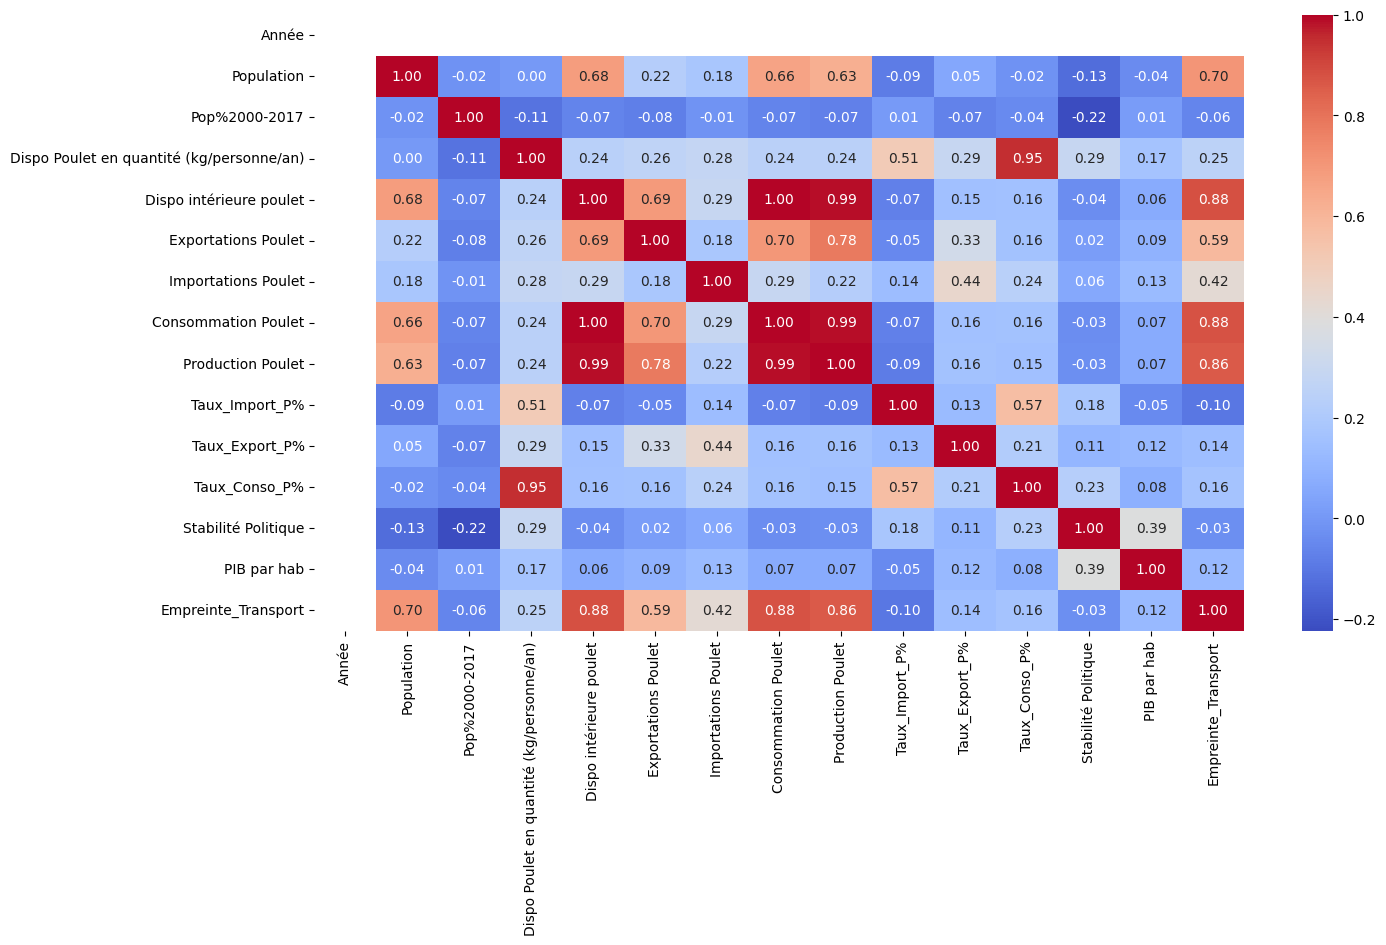

In [122]:
plt.figure(figsize=(15,8))
sns.heatmap(Df_2017.corr(),annot=True,fmt=".2f",cmap="coolwarm")

Apparition de certaine corrélation entre nos différentes variables notamment sur les importations,exportations et consommation

In [123]:
Df_2017

,Zone,Année,Population,Pop%2000-2017,Dispo Poulet en quantité (kg/personne/an),Dispo intérieure poulet,Exportations Poulet,Importations Poulet,Consommation Poulet,Production Poulet,Taux_Import_P%,Taux_Export_P%,Taux_Conso_P%,Stabilité Politique,PIB par hab,Empreinte_Transport
0,Afghanistan,2017,36296113,74.668889,1.53,57.0,0.0,29.0,55.0,28.0,0.64,0.00,0.42,-2.80,530.149831,233.2650
1,Afrique du Sud,2017,57009756,26.779324,35.69,2118.0,63.0,514.0,2035.0,1667.0,5.70,0.57,6.41,-0.28,6723.928582,5690.0121
2,Albanie,2017,2884169,-7.831734,16.36,47.0,0.0,38.0,47.0,13.0,4.30,0.00,1.29,0.38,4521.752219,249.6215
3,Algérie,2017,41389189,33.331859,6.38,277.0,0.0,2.0,264.0,275.0,0.01,0.00,0.80,-0.92,4134.936054,4713.7950
4,Allemagne,2017,82658409,1.544857,19.47,1739.0,646.0,842.0,1609.0,1514.0,1.27,1.10,2.06,0.59,44670.222288,12435.9200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484,21.535805,20.28,626.0,0.0,25.0,596.0,600.0,0.54,0.00,3.80,-1.27,8112.053374,3707.0000
232,Viet Nam,2017,94600648,18.383382,12.33,1206.0,1.0,291.0,1166.0,918.0,1.14,0.00,1.73,0.23,2379.800196,3960.9400
233,Yémen,2017,27834819,59.886862,8.53,246.0,0.0,78.0,237.0,168.0,1.27,0.00,2.82,-2.94,612.353054,287.1000
234,Zambie,2017,16853599,61.805776,3.42,60.0,1.0,12.0,58.0,49.0,2.28,0.12,0.97,0.15,1495.437665,126.5025


In [125]:
Df_2017.to_csv('DAN-P9-data/Df_2017.csv',index=False)